<a href="https://colab.research.google.com/github/jhenac/fuego-data-analysis/blob/main/fuego_networx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Create a Sales Report using the POS file that shows
1. Sales per day, (count per transaction and total amount of COG)
2. Sales per Dispatcher (based on created by), (count per transaction, and total amount of COG)
3. Sales per platform (WeedMaps and Meadow)

In [2]:
df_pos = pd.read_csv('POS.csv')

In [3]:
df_pos.columns = df_pos.iloc[0]
df_pos = df_pos[1:]

In [4]:
df_pos.to_csv('POS.csv', index=False)

In [5]:
df_pos['COGs'] = df_pos['COGs'].str.replace('$','').str.replace('(','').str.replace(')','')

<ipython-input-5-ddc8cebecbd8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pos['COGs'] = df_pos['COGs'].str.replace('$','').str.replace('(','').str.replace(')','')


In [6]:
df_pos['COGs'] = pd.to_numeric(df_pos['COGs'])

In [7]:
df_pos['Date'] = pd.to_datetime(df_pos['Date'])

In [8]:
df_pos['Date_New'] = df_pos['Date'].dt.date

In [59]:
df_pos.groupby('Date_New').agg({'COGs': ['count', 'sum']})

0           COGs         
           count      sum
Date_New                 
2023-02-13   823  7999.92
2023-02-14   791  7515.68
2023-02-15   878  8007.80
2023-02-16   871  8051.32
2023-02-17   909  9452.54
2023-02-18   927  9291.91
2023-02-19   934  9135.46

In [44]:
df_pos_count = df_pos.groupby('Date_New').count()['COGs']
df_pos_count

Date_New
2023-02-13    823
2023-02-14    791
2023-02-15    878
2023-02-16    871
2023-02-17    909
2023-02-18    927
2023-02-19    934
Name: COGs, dtype: int64

In [45]:
df_pos_sum = df_pos.groupby('Date_New').sum()['COGs']
df_pos_sum

<ipython-input-45-e62f0b52553e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pos_sum = df_pos.groupby('Date_New').sum()['COGs']


Date_New
2023-02-13    7999.92
2023-02-14    7515.68
2023-02-15    8007.80
2023-02-16    8051.32
2023-02-17    9452.54
2023-02-18    9291.91
2023-02-19    9135.46
Name: COGs, dtype: float64

The above shows the number of sales and the total sales per day.

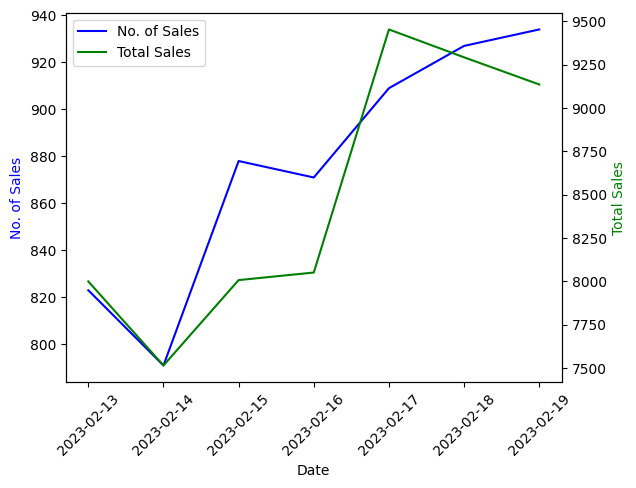

In [63]:
ax1 =plt.gca()
plt.xticks(rotation=45)
ax2 = ax1.twinx()

l1 = ax1.plot(df_pos_count.index, df_pos_count.values, color='b', label='No. of Sales')
l2 = ax2.plot(df_pos_sum.index, df_pos_sum.values, color='g', label='Total Sales')

ax1.set_xlabel('Date')
ax1.set_ylabel('No. of Sales', color='b')
ax2.set_ylabel('Total Sales', color='g')
ax1.legend(handles=l1+l2)


In [10]:
df_pos.groupby('Created By').agg({'COGs': ['sum', 'count']})

0                             COGs      
                               sum count
Created By                              
Alpha Mae Aquino           1221.92   134
April Dawn Sale             968.74   131
Auggi Paulo Abunda         2491.89   234
Cessy Raygon               3853.37   353
Clarissa  Palapar           195.10    11
Clifford Fajardo           2375.96   285
Corina Chiprez              320.98    35
Cristal Jane  Petil        2746.55   350
Danielle Dela Cruz         2706.32   232
Emmanuel Lalantacon        1004.44   133
Gabrielle Sanchez          2705.63   256
Glenn Repolidon             390.61    47
Jeciel Gumila              2278.77   231
Jessica Rosales            3097.04   355
Jonathan (DISPATCH) Paypa  2074.50   226
Katrina Brewer             4122.78   417
Kevin Perfas               1684.99   179
Leeco  Mamigo               708.41    67
Lorraine Gesulga           1332.20   150
MARC ANDREW FRIAS          1975.99   205
Mae Ann Ngujo              2473.58   267
Marie Antoinette Mamigo      17.61     2
Nessaq Bitac               1422.55   149
Queenie  Pagara            3915.64   394
Rishel Llaneta             2396.82   227
Rudolph Paras               229.82    19
Syrell Abuel               5880.96   567
Vernie Caliao              4861.46   477

In [60]:
df_pos_by = df_pos.groupby('Created By').sum()['COGs']

<ipython-input-60-8264ef5cdfc1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pos_by = df_pos.groupby('Created By').sum()['COGs']


In [66]:
px.bar(df_pos_by, x=df_pos_by.index, y=df_pos_by.values, title='Sales Per Person',
       labels={'y': 'Sales'}
       )

Syrell Abuel has the highest sales amounting to $5,880.96 and 567 orders.

In [11]:
df_pos_meadow = df_pos[df_pos['Order Tags'].str.contains('MEADOW') == True]
df_pos_meadow.groupby('Order Tags').agg({'COGs': ['sum', 'count']})

0                                                      COGs      
                                                        sum count
Order Tags                                                       
CASHAPP;MEADOW;Delivery                               20.50     2
MEADOW;Delivery                                       60.01     5
MEADOW;Delivery;AT COST PROMO;CASH                    12.50     3
MEADOW;Delivery;AT COST PROMO;LEDGER GREEN            28.50     4
MEADOW;Delivery;AT COST PROMO;PAYTENDER              131.01    14
MEADOW;Delivery;CASH                                3398.16   353
MEADOW;Delivery;ID Verified;CASH                     289.20    25
MEADOW;Delivery;ID Verified;LEDGER GREEN             181.41    21
MEADOW;Delivery;ID Verified;PAYTENDER                155.50     8
MEADOW;Delivery;LEDGER GREEN                        4824.78   514
MEADOW;Delivery;PAYTENDER                           1256.41   139
MEADOW;Delivery;SAMEDAY PREORDER;CASH                159.42    12
MEADOW;Delivery;SAMEDAY PREORDER;LEDGER GREEN        167.00    13
MEADOW;Delivery;SAMEDAY PREORDER;PAYTENDER            94.40     8
MEADOW;Delivery;cash                                 406.10    43
MEADOW;NEXT DAY PREORDER;Delivery;CASH              1046.34    51
MEADOW;NEXT DAY PREORDER;Delivery;LEDGER GREEN       565.70    49
MEADOW;NEXT DAY PREORDER;Delivery;PAYTENDER           34.13     8
MEADOW;NEXT DAY PREORDER;PAYTENDER                    88.20     8
MEADOW;PHONECALL;Delivery;LEDGER GREEN               107.65    12
MEADOW;PHONECALL;Delivery;PAYTENDER                   63.00     5
MEADOW;REC Verified;CASH                             108.00     4
MEADOW;REC Verified;Delivery;CASH                    242.78    24
MEADOW;REC Verified;Delivery;LEDGER GREEN            101.51     9
MEADOW;REC Verified;Delivery;PAYTENDER               119.02    12
MEADOW;REC Verified;Delivery;cash                    162.01     6
MEADOW;REC Verified;NEXT DAY PREORDER;CASH            16.41     4
MEADOW;REC Verified;NEXT DAY PREORDER;Delivery;...    37.00     2
MEADOW;REC Verified;paytender;Delivery                18.00     2
MEADOW;SAME DAY PRE ORDER ;Delivery;CASH              75.02     9
MEADOW;SAME DAY PRE ORDER ;Delivery;ID Verified...    80.50     4
MEADOW;SAME DAY PRE ORDER ;REC Verified;Deliver...    27.50     4
MEADOW;paytender;Delivery                             66.00     7
MEADOW;paytender;Delivery;ID Verified                 14.60     3
NEW CUSTOMER;MEADOW;Delivery;CASH                     52.80     4
NEW CUSTOMER;MEADOW;Delivery;LEDGER GREEN             18.01     3
PREORDER;MEADOW;Delivery;CASH                        263.54    25
PREORDER;MEADOW;Delivery;LEDGER GREEN                194.45    14
PREORDER;MEADOW;Delivery;PAYTENDER                    71.00     5
PREORDER;MEADOW;REC Verified;Delivery;CASH            95.05     2
PREORDER;MEADOW;SAVE ORDER PROMO ;Delivery;CASH       19.51     5
PREORDER;MEADOW;SAVE ORDER PROMO ;Delivery;LEDG...    36.02     4
PREORDER;MEADOW;SAVE ORDER PROMO ;Delivery;cash       51.01     2
SAME DAY PRE ORDER ;MEADOW;CASH                       24.00     1
SAVE ORDER PROMO ;MEADOW;NEXT DAY PREORDER;Deli...    10.02     4

Above is the total sales and number of sales by Meadow.

In [12]:
df_pos_weedmaps = df_pos[df_pos['Order Tags'].str.contains('WEEDMAPS') == True]
df_pos_weedmaps.groupby('Order Tags').agg({'COGs': ['sum', 'count']})

0                                                       COGs      
                                                         sum count
Order Tags                                                        
WEEDMAPS;CASH                                          16.50     4
WEEDMAPS;CASHAPP;Delivery                               8.75     2
WEEDMAPS;Delivery;AT COST PROMO;CASH                  104.51    11
WEEDMAPS;Delivery;AT COST PROMO;LEDGER GREEN           78.50     9
WEEDMAPS;Delivery;CASH                              13913.32  1678
WEEDMAPS;Delivery;CASH;LEDGER GREEN                    36.70     3
WEEDMAPS;Delivery;CASH;PAYTENDER                       20.00     3
WEEDMAPS;Delivery;CASH;SAMEDAY PREORDER               184.51    16
WEEDMAPS;Delivery;ID Verified;CASH                    352.08    53
WEEDMAPS;Delivery;ID Verified;LEDGER GREEN            154.40    12
WEEDMAPS;Delivery;ID Verified;PAYTENDER                51.00     1
WEEDMAPS;Delivery;LEDGER GREEN                       3679.82   422
WEEDMAPS;Delivery;LG                                   16.00     2
WEEDMAPS;Delivery;PAYTENDER                           809.12    99
WEEDMAPS;Delivery;SAMEDAY PREORDER;CASH               109.56    16
WEEDMAPS;Delivery;SAMEDAY PREORDER;PAYTENDER           91.50     2
WEEDMAPS;Delivery;cash                               2585.49   252
WEEDMAPS;LEDGER GREEN                                  15.00     2
WEEDMAPS;NEW CUSTOMER;Delivery;CASH                    89.32    15
WEEDMAPS;NEW CUSTOMER;Delivery;LEDGER GREEN            45.00     3
WEEDMAPS;NEXT DAY PREORDER;Delivery;CASH              811.93    68
WEEDMAPS;NEXT DAY PREORDER;Delivery;ID Verified...     42.00     2
WEEDMAPS;NEXT DAY PREORDER;Delivery;LEDGER GREEN       66.25     5
WEEDMAPS;NEXT DAY PREORDER;Delivery;PAYTENDER         121.00     3
WEEDMAPS;NEXT DAY PREORDER;Delivery;cash               38.02     4
WEEDMAPS;NEXT DAY PREORDER;PHONE;Delivery              50.00     1
WEEDMAPS;NEXT DAY PREORDER;PHONE;Delivery;cash         61.30     4
WEEDMAPS;PHONECALL;Delivery;CASH                       43.76     9
WEEDMAPS;PHONECALL;Delivery;LEDGER GREEN               38.55     6
WEEDMAPS;PREORDER;Delivery;CASH                       515.62    37
WEEDMAPS;PREORDER;Delivery;LEDGER GREEN               142.74     7
WEEDMAPS;PREORDER;REC Verified;CASH                    75.00     4
WEEDMAPS;PREORDER;SAVE ORDER PROMO ;Delivery;CASH      43.02     7
WEEDMAPS;REC Verified;Delivery;CASH                   967.91    95
WEEDMAPS;REC Verified;Delivery;ID Verified;CASH        20.50     7
WEEDMAPS;REC Verified;Delivery;ID Verified;cash        36.00     2
WEEDMAPS;REC Verified;Delivery;LEDGER GREEN           143.50    14
WEEDMAPS;REC Verified;Delivery;PAYTENDER               56.00     4
WEEDMAPS;REC Verified;Delivery;cash                   113.55    20
WEEDMAPS;REC Verified;NEXT DAY PREORDER;Deliver...    190.65     5
WEEDMAPS;REC Verified;PHONECALL;Delivery;SAMEDA...     45.77     4
WEEDMAPS;SAME DAY PRE ORDER ;Delivery;CASH            321.13    15
WEEDMAPS;SAME DAY PRE ORDER ;LEDGER GREEN              58.00     3
WEEDMAPS;SAME DAY PRE ORDER ;paytender;Delivery        76.10     3
WEEDMAPS;SAVE ORDER PROMO ;Delivery;CASH              143.90    35
WEEDMAPS;SAVE ORDER PROMO ;Delivery;LEDGER GREEN       57.13    11
WEEDMAPS;SAVE ORDER PROMO ;Delivery;cash               80.77     9
WEEDMAPS;SAVE ORDER PROMO ;NEXT DAY PREORDER;De...      6.01     3
WEEDMAPS;SAVE ORDER PROMO ;REC Verified;Deliver...     15.01     3
WEEDMAPS;SAVE ORDER PROMO ;SAME DAY PRE ORDER ;...      0.09     2
WEEDMAPS;SPLIT PAYMENT ;Delivery;CASH;LEDGER GR...     12.01     3
WEEDMAPS;paytender;Delivery                           133.52    14

Above is the total sales and number of sales by Weedmaps.

# Create Order Report
1. Determine how many orders per day in Weedmaps and Meadow and provide the status of the order

In [13]:
df_weedmaps = pd.read_csv('WeedMaps.csv')

In [14]:
df_meadow = pd.read_excel('Meadow.xlsm')

In [15]:
df_weedmaps['Date/Time'] = pd.to_datetime(df_weedmaps['Date/Time'])
df_weedmaps['Date_New'] = df_weedmaps['Date/Time'].dt.date

In [16]:
df_weedmaps.groupby(['Date_New', 'Status']).agg({'Status': ['count']})

Status
                     count
Date_New   Status         
2023-02-13 Canceled     17
           Complete    131
2023-02-14 Canceled     22
           Complete    124
2023-02-15 Canceled     22
           Complete    156
2023-02-16 Canceled     24
           Complete    173
2023-02-17 Canceled     23
           Complete    163
2023-02-18 Canceled     12
           Complete    162
2023-02-19 Canceled     13
           Complete    163

In [104]:
df_weedmaps_status = df_weedmaps.groupby(['Date_New', 'Status']).agg({'Status': ['count']})

<Axes: ylabel='Date_New,Status'>

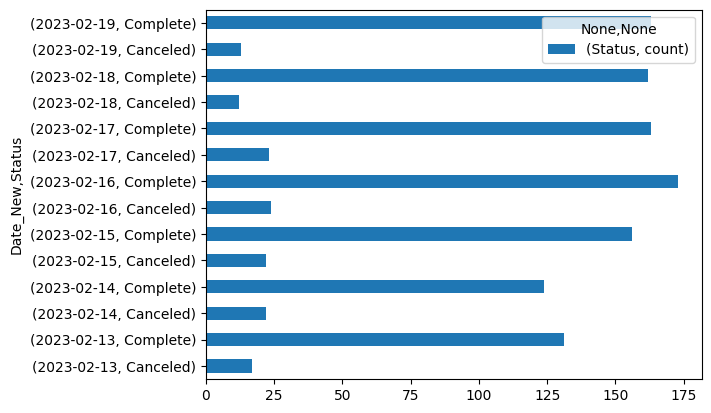

In [105]:
df_weedmaps_status.plot(kind='barh')

In [17]:
df_meadow['Date'] = pd.to_datetime(df_meadow['Date'])
df_meadow['Date_New'] = df_meadow['Date'].dt.date

In [18]:
df_meadow.groupby(['Date_New', 'Status']).agg({'Status': ['count']})

Status
                      count
Date_New   Status          
2023-02-13 fulfilled     47
           packed        17
2023-02-14 fulfilled     53
           packed         2
2023-02-15 fulfilled     61
           packed         2
2023-02-16 fulfilled     69
           packed         1
2023-02-17 fulfilled     61
           packed         1
2023-02-18 fulfilled     71
2023-02-19 fulfilled     58

<Axes: ylabel='Date_New,Status'>

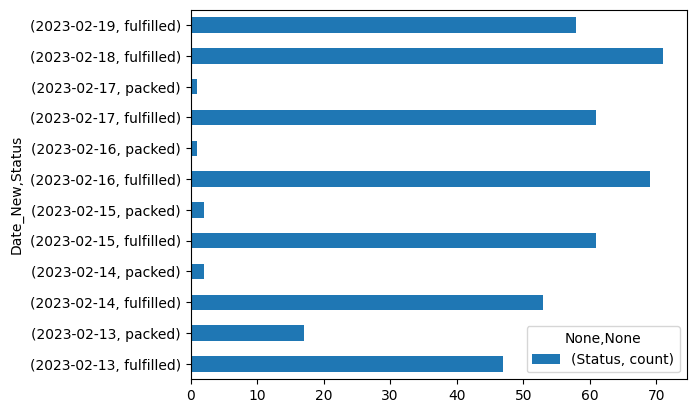

In [113]:
df_meadow_status = df_meadow.groupby(['Date_New', 'Status']).agg({'Status': ['count']})

df_meadow_status.plot(kind='barh')

#  Create a cross reference report between POS vs Weedmaps and Meadow
1. How many orders from Weedmaps/Meadow were completed in POS

In [19]:
df_pos_weedmaps.groupby('Trans Status').size()

Trans Status
Completed              3013
RefundWithInventory       1
dtype: int64

In [20]:
df_weedmaps.groupby('Status').size()

Status
Canceled     133
Complete    1072
dtype: int64

Weedmaps completed 3,013 transactions in POS but only 1,072 based on tracker.

In [112]:
df = df_weedmaps.groupby('Status').size()

fig = px.pie(
    labels=df.index,
    values=df.values,
    title="Weedmaps Status of Delivery",
    names=df.index,
    hole=0.4,
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [21]:
df_pos_meadow.groupby('Trans Status').size()

Trans Status
Completed              1450
RefundWithInventory       6
dtype: int64

In [22]:
df_meadow.groupby('Status').size()

Status
fulfilled    420
packed        23
dtype: int64

Meadow completed 1,450 transactions in POS but only 420 based on tracker.

In [111]:
df = df_meadow.groupby('Status').size()
fig = px.pie(
    labels=df.index,
    values=df.values,
    title="Meadow Status of Delivery",
    names=df.index,
    hole=0.4,
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [23]:
df_pos_meadow[:1]

,Date,Trans No.,Trans Type,Trans Status,Queue Type,Product Name,Product Category,Member,COGs,Employee,Terminal,Created By,Created Date,Order Tags,Date_New
6,2023-02-19 23:12:00,582109,Sale,Completed,Delivery,Midsfactory Cartridge - Watermelon Zkittlez (1...,Cartridges,"KEVIN CHOE ""vip""",10.0,Devin McDonald,Bag#31,Emmanuel Lalantacon,02/19/2023 21:33:32:635,MEADOW;Delivery;CASH,2023-02-19


In [110]:
df = df_pos_meadow.groupby('Queue Type').size()
print(df)

fig = px.pie(
    labels=df.index,
    values=df.values,
    title="Queue Type",
    names=df.index,
    hole=0.4,
)

fig.show()

Queue Type
Delivery    1452
Special        4
dtype: int64


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [25]:
df_meadow[:1]

,ID,Date,Time,Status,Type,Medical,Tax Exempt,Customer Name,Date_New
0,2830122155,2023-02-13 09:00:41,2023-02-13 09:00:41,packed,delivery,No,No,Michael Rothschild,2023-02-13


In [26]:
df_pos_weedmaps[:1]

,Date,Trans No.,Trans Type,Trans Status,Queue Type,Product Name,Product Category,Member,COGs,Employee,Terminal,Created By,Created Date,Order Tags,Date_New
1,2023-02-19 23:18:00,582128,Sale,Completed,Delivery,Malibu Diamond Infused Flowers - Low Tide (3.5...,Flowers,Bruce Sotelo,18.0,Devin McDonald,Bag#31,Emmanuel Lalantacon,02/19/2023 21:46:21:459,WEEDMAPS;Delivery;CASH,2023-02-19


In [27]:
df_weedmaps[:1]

,Order ID,Date/Time,Status,Type,Source,WMID,Customer Name,Fulfillment Status,Date_New
0,27504799,2023-02-13 09:01:28.886767-08:00,Complete,delivery,online order,686700914,Barron Montgomery,complete,2023-02-13
